# Importer les packages

In [ ]:
pip install scikit-learn

In [3]:
# Importer les librairies nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Scikit-learn modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Charger les données

In [9]:
# Chargement des données
url = "Cervical Cancer (Risk Factors)/Data/DATA SET-1.csv"
data = pd.read_csv(url, na_values='?')

# Aperçu des données
print("Dimensions:", data.shape)
data.head()

Dimensions: (859, 36)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Analyse exploratoire (EDA)

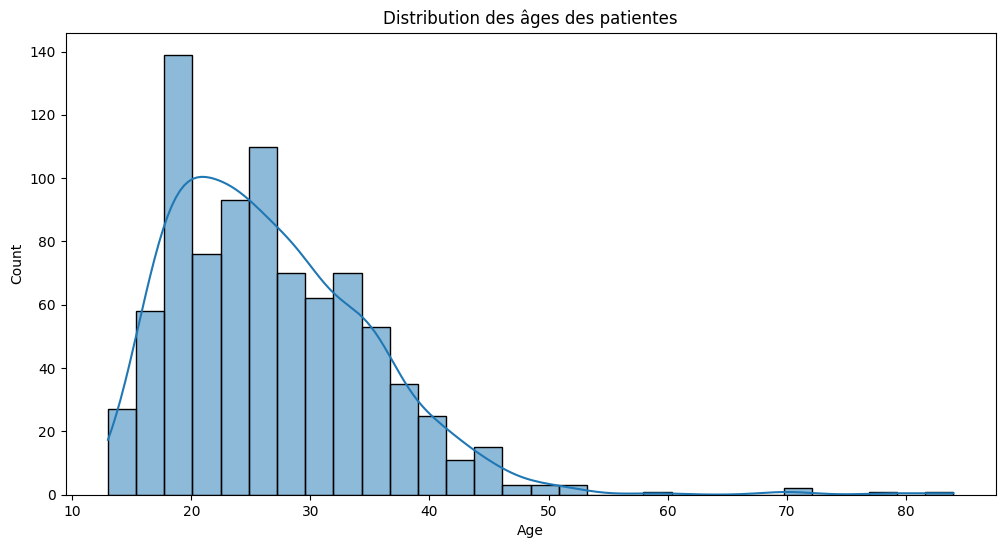

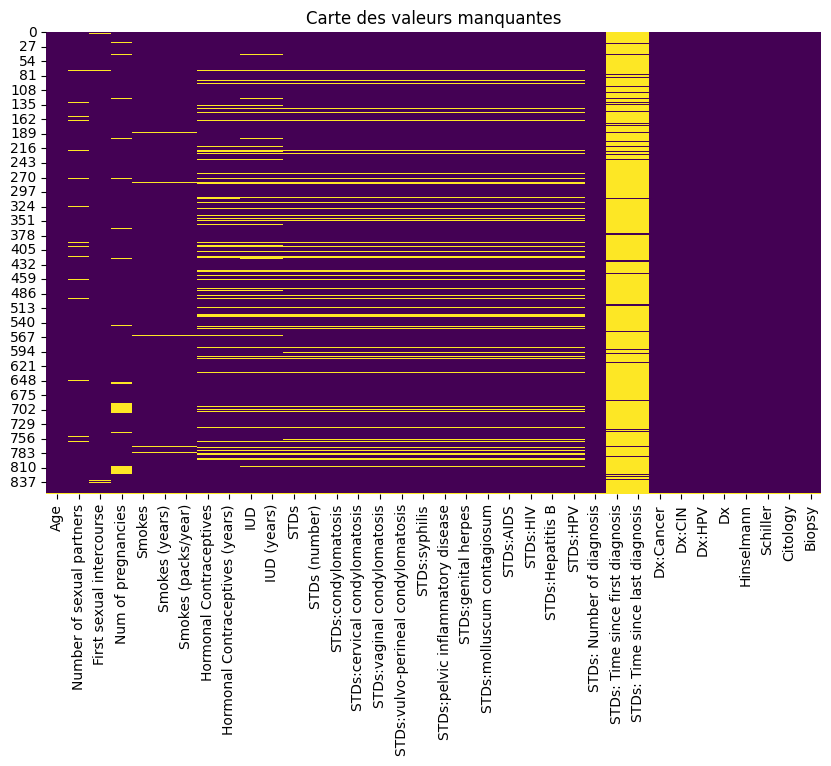

In [10]:
# Statistiques descriptives
data.describe()

# Visualisation de la distribution d'âge
plt.figure(figsize=(12,6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution des âges des patientes')
plt.show()

# Vérification des valeurs manquantes
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Carte des valeurs manquantes')
plt.show()

# Prétraitement des données

In [11]:
# Sélection des caractéristiques
features = ['Age', 'Number of sexual partners', 'First sexual intercourse', 
            'Num of pregnancies', 'Smokes', 'Hormonal Contraceptives', 
            'STDs', 'STDs (number)', 'Dx:HPV']
target = 'Dx:Cancer'

data = data[features + [target]]

# Gestion des valeurs manquantes
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Conversion des types
data_imputed = data_imputed.astype({'Dx:Cancer': int, 'Dx:HPV': int})
data_imputed.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Hormonal Contraceptives,STDs,STDs (number),Dx:HPV,Dx:Cancer
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0,0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0,0
2,34.0,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0,0
3,52.0,5.0,16.0,4.0,1.0,1.0,0.0,0.0,1,1
4,46.0,3.0,21.0,4.0,0.0,1.0,0.0,0.0,0,0


#  Division des données

In [13]:
# Séparation features/target
X = data_imputed[features]
y = data_imputed[target]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

print("Taille train:", X_train.shape)
print("Taille test:", X_test.shape)

Taille train: (601, 9)
Taille test: (258, 9)


# Construction des modèles

In [14]:
# Pipeline de régression logistique
lr_model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, random_state=42)
)
lr_model.fit(X_train, y_train)

# Pipeline de réseau de neurones
nn_model = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(50, 30, 10),
                 max_iter=1000, random_state=42,
                 early_stopping=True)
)
nn_model.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('mlpclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001


# Visualisation de l'apprentissage

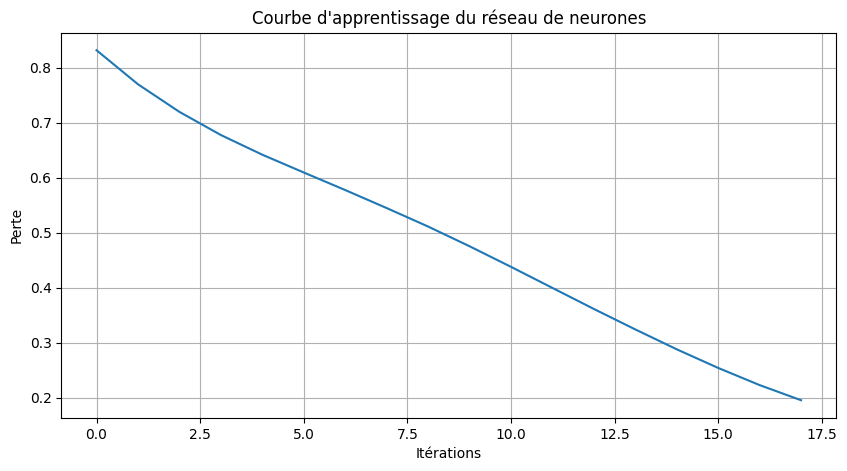

In [15]:
# Courbe d'apprentissage du réseau de neurones
plt.figure(figsize=(10,5))
plt.plot(nn_model.named_steps['mlpclassifier'].loss_curve_)
plt.title("Courbe d'apprentissage du réseau de neurones")
plt.xlabel("Itérations")
plt.ylabel("Perte")
plt.grid()
plt.show()

# Évaluation des modèles


=== Performance du modèle Régression Logistique ===
Accuracy: 0.99


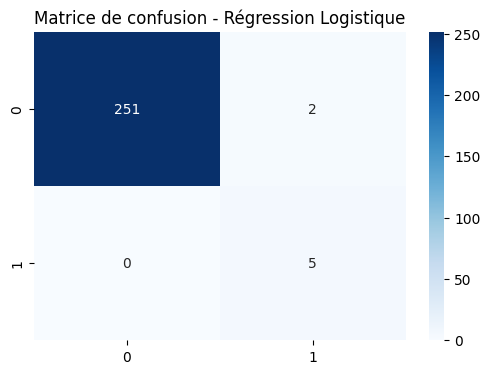


Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       253
           1       0.71      1.00      0.83         5

    accuracy                           0.99       258
   macro avg       0.86      1.00      0.91       258
weighted avg       0.99      0.99      0.99       258


=== Performance du modèle Réseau de Neurones ===
Accuracy: 0.99


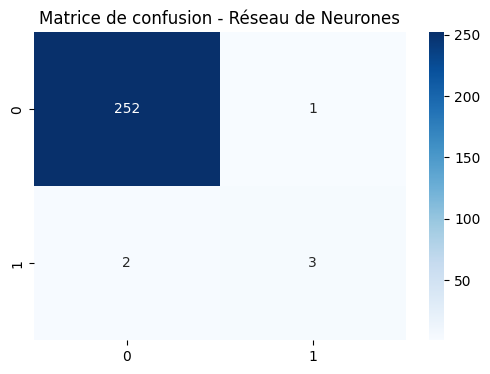


Rapport de classification:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       253
           1       0.75      0.60      0.67         5

    accuracy                           0.99       258
   macro avg       0.87      0.80      0.83       258
weighted avg       0.99      0.99      0.99       258



In [16]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    print(f"\n=== Performance du modèle {model_name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    
    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matrice de confusion - {model_name}')
    plt.show()
    
    # Rapport de classification
    print("\nRapport de classification:")
    print(classification_report(y_test, y_pred))

# Évaluation des modèles
evaluate_model(lr_model, X_test, y_test, "Régression Logistique")
evaluate_model(nn_model, X_test, y_test, "Réseau de Neurones")

# Analyse d'importance des caractéristiques

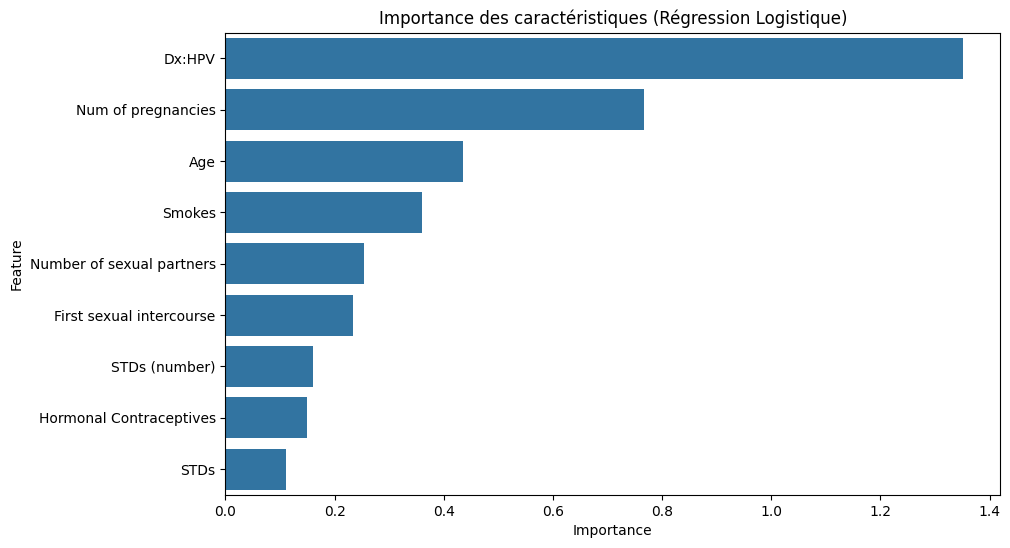

In [17]:
# Importance des caractéristiques pour la régression logistique
if hasattr(lr_model.named_steps['logisticregression'], 'coef_'):
    importance = pd.DataFrame({
        'Feature': features,
        'Importance': np.abs(lr_model.named_steps['logisticregression'].coef_[0])
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10,6))
    sns.barplot(x='Importance', y='Feature', data=importance)
    plt.title('Importance des caractéristiques (Régression Logistique)')
    plt.show()

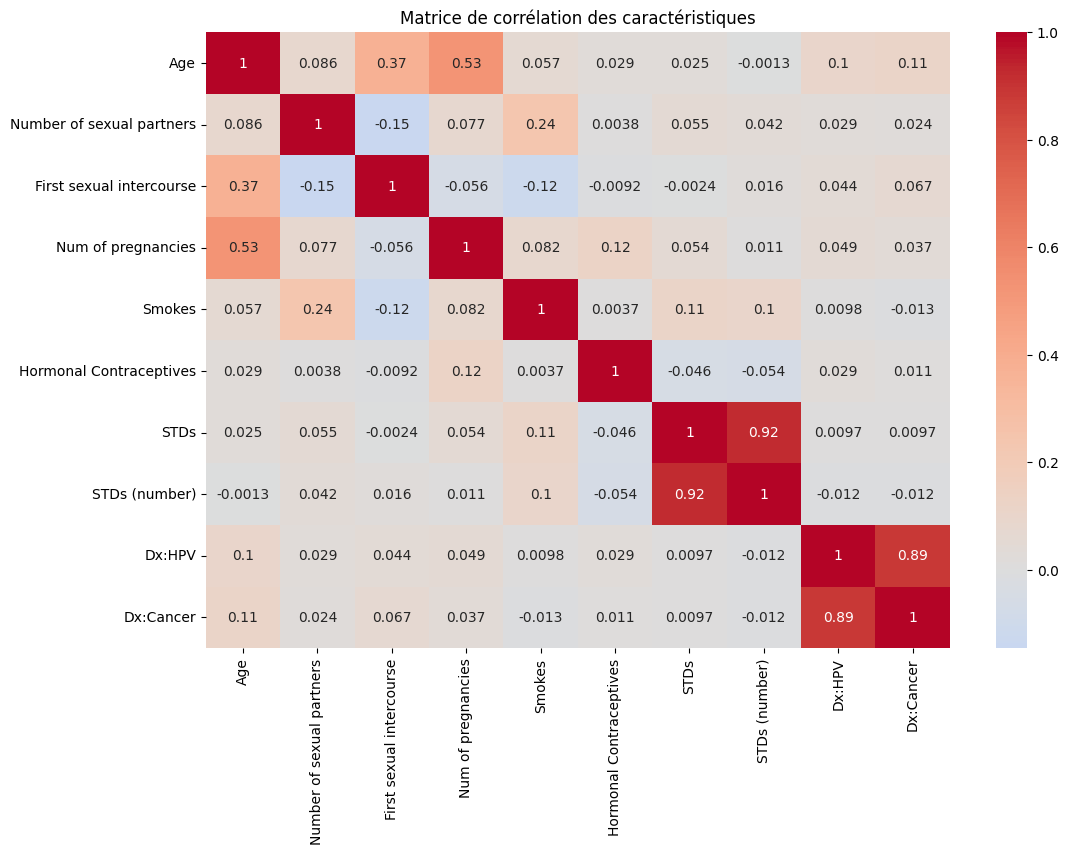

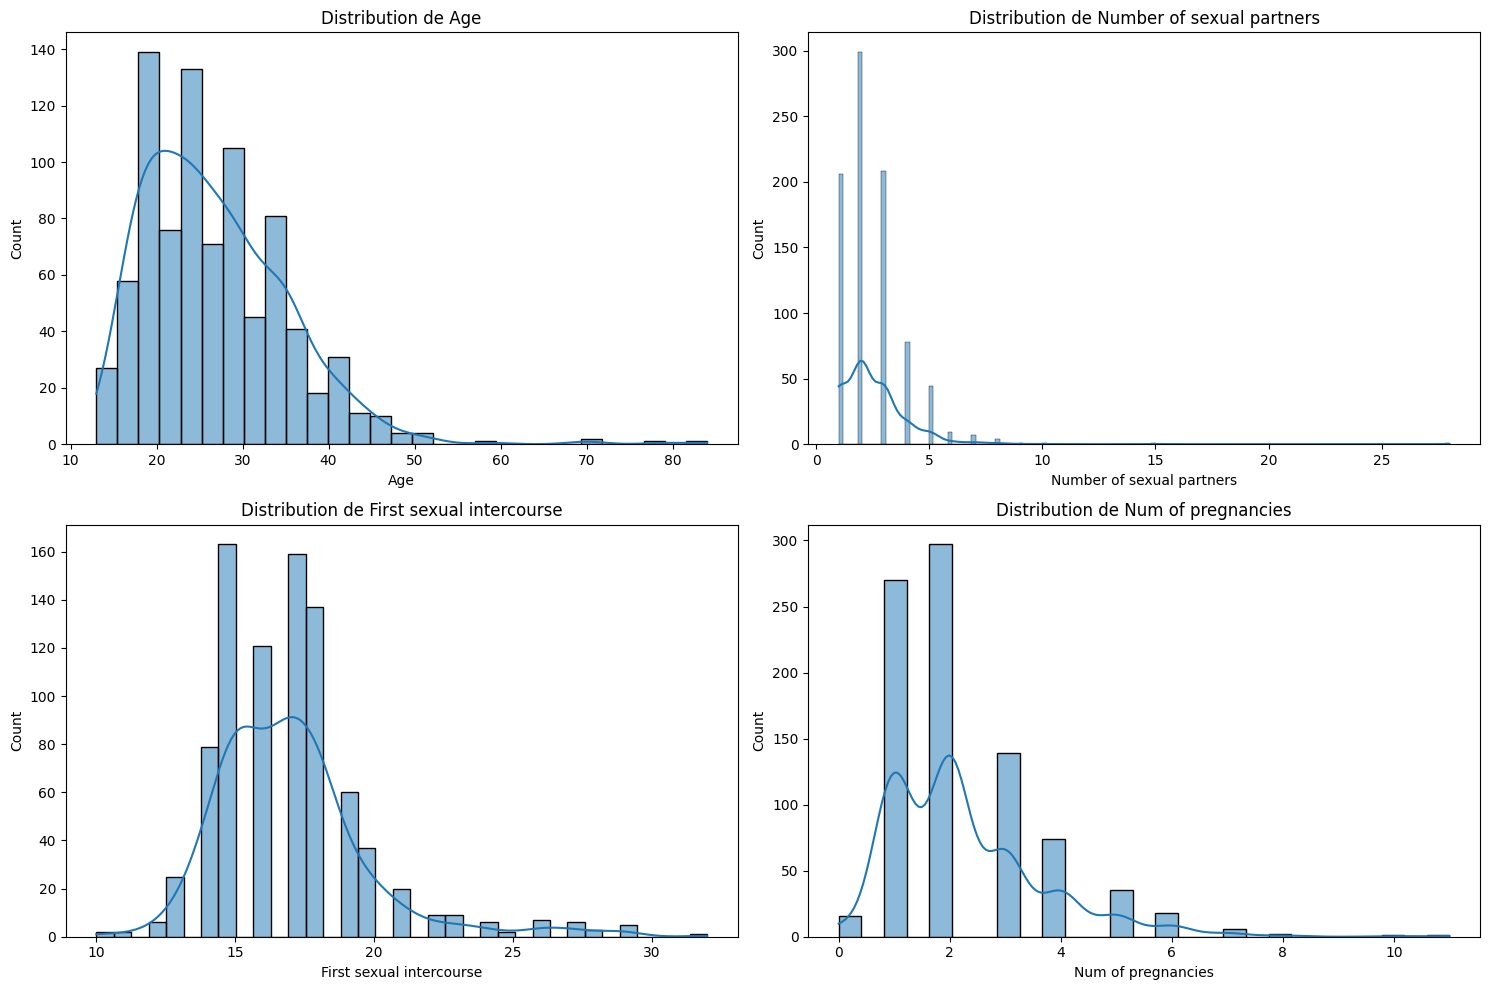

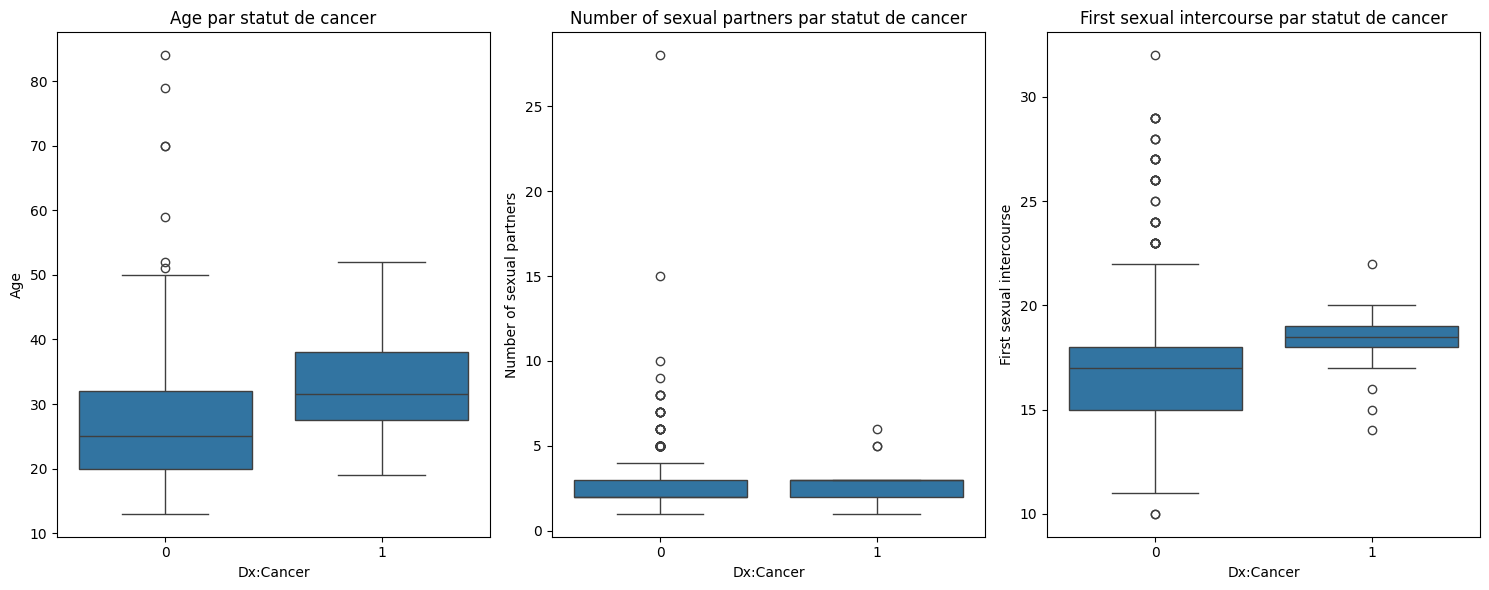

In [18]:
# Visualisation des corrélations
plt.figure(figsize=(12, 8))
corr_matrix = data_imputed.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation des caractéristiques')
plt.show()

# Distribution des caractéristiques importantes
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies']):
    plt.subplot(2, 2, i+1)
    sns.histplot(data_imputed[col], kde=True)
    plt.title(f'Distribution de {col}')
plt.tight_layout()
plt.show()

# Boxplots par statut de cancer
plt.figure(figsize=(15, 6))
for i, col in enumerate(['Age', 'Number of sexual partners', 'First sexual intercourse']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Dx:Cancer', y=col, data=data_imputed)
    plt.title(f'{col} par statut de cancer')
plt.tight_layout()
plt.show()

Random Forest - Accuracy moyenne: 0.99 (±0.00)
SVM - Accuracy moyenne: 0.99 (±0.01)

=== Performance du modèle Random Forest ===
Accuracy: 0.99


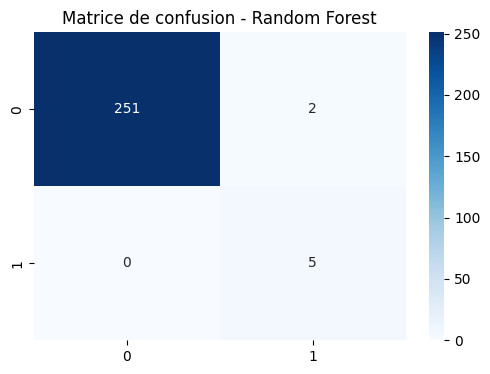


Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       253
           1       0.71      1.00      0.83         5

    accuracy                           0.99       258
   macro avg       0.86      1.00      0.91       258
weighted avg       0.99      0.99      0.99       258


=== Performance du modèle SVM ===
Accuracy: 0.99


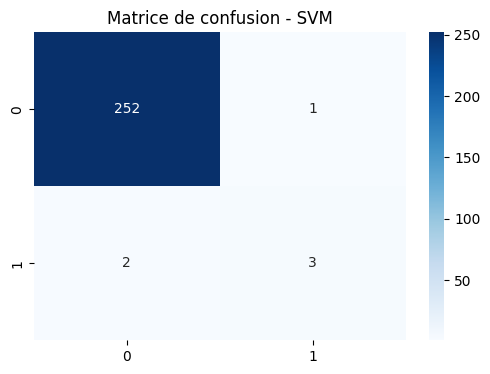


Rapport de classification:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       253
           1       0.75      0.60      0.67         5

    accuracy                           0.99       258
   macro avg       0.87      0.80      0.83       258
weighted avg       0.99      0.99      0.99       258



In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Random Forest
rf_model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(n_estimators=100, random_state=42)
)
rf_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Random Forest - Accuracy moyenne: {rf_scores.mean():.2f} (±{rf_scores.std():.2f})")

# SVM
svm_model = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', random_state=42)
)
svm_scores = cross_val_score(svm_model, X, y, cv=5)
print(f"SVM - Accuracy moyenne: {svm_scores.mean():.2f} (±{svm_scores.std():.2f})")

# Entraînement et évaluation complète
models = {
    'Random Forest': rf_model,
    'SVM': svm_model
}

for name, model in models.items():
    model.fit(X_train, y_train)
    evaluate_model(model, X_test, y_test, name)

Meilleurs paramètres Random Forest:
{'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 50}

=== Performance du modèle Random Forest optimisé ===
Accuracy: 0.99


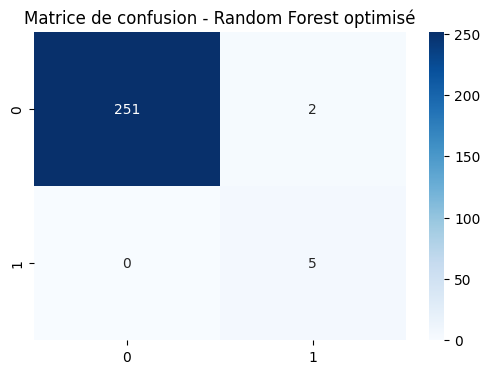


Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       253
           1       0.71      1.00      0.83         5

    accuracy                           0.99       258
   macro avg       0.86      1.00      0.91       258
weighted avg       0.99      0.99      0.99       258


Meilleurs paramètres SVM:
{'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}

=== Performance du modèle SVM optimisé ===
Accuracy: 0.99


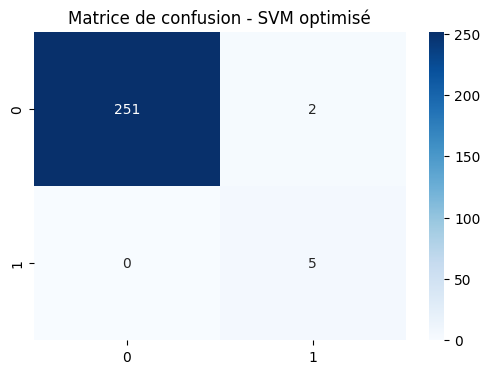


Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       253
           1       0.71      1.00      0.83         5

    accuracy                           0.99       258
   macro avg       0.86      1.00      0.91       258
weighted avg       0.99      0.99      0.99       258



In [20]:
from sklearn.model_selection import GridSearchCV

# Paramètres pour Random Forest
rf_params = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

print("Meilleurs paramètres Random Forest:")
print(rf_grid.best_params_)
evaluate_model(rf_grid.best_estimator_, X_test, y_test, "Random Forest optimisé")

# Paramètres pour SVM
svm_params = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto', 0.01, 0.1],
    'svc__kernel': ['rbf', 'linear']
}

svm_grid = GridSearchCV(svm_model, svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

print("\nMeilleurs paramètres SVM:")
print(svm_grid.best_params_)
evaluate_model(svm_grid.best_estimator_, X_test, y_test, "SVM optimisé")

In [21]:
import joblib
from datetime import datetime

# Créer un dossier models s'il n'existe pas
import os
if not os.path.exists('models'):
    os.makedirs('models')

# Sauvegarde du meilleur modèle
best_model = rf_grid.best_estimator_
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f'models/cervical_cancer_model_{timestamp}.joblib'
joblib.dump(best_model, filename)

print(f"Modèle sauvegardé sous {filename}")

# Chargement test
loaded_model = joblib.load(filename)
print("Test de chargement - Accuracy:", 
      accuracy_score(y_test, loaded_model.predict(X_test)))

Modèle sauvegardé sous models/cervical_cancer_model_20250614_090934.joblib
Test de chargement - Accuracy: 0.9922480620155039


C:\Users\engoy\AppData\Local\Temp\ipykernel_21416\2871272456.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


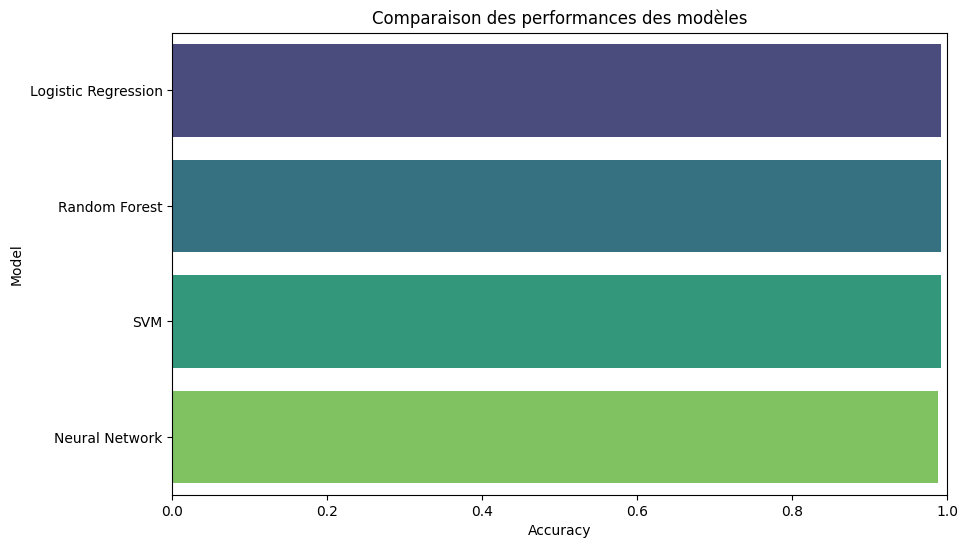

,Model,Accuracy
0,Logistic Regression,0.992248
2,Random Forest,0.992248
3,SVM,0.992248
1,Neural Network,0.988372


In [26]:
results = []
for name, model in {
    'Logistic Regression': lr_model,
    'Neural Network': nn_model,
    'Random Forest': rf_grid.best_estimator_,
    'SVM': svm_grid.best_estimator_
}.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': acc})

results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Comparaison des performances des modèles')
plt.xlim(0, 1)
plt.show()

display(results_df)